<a href="https://colab.research.google.com/github/Sewanmpm/SlumImprovment/blob/main/vectorwhiteonblack_list.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install numpy matplotlib opencv-python-headless scikit-image pyshp

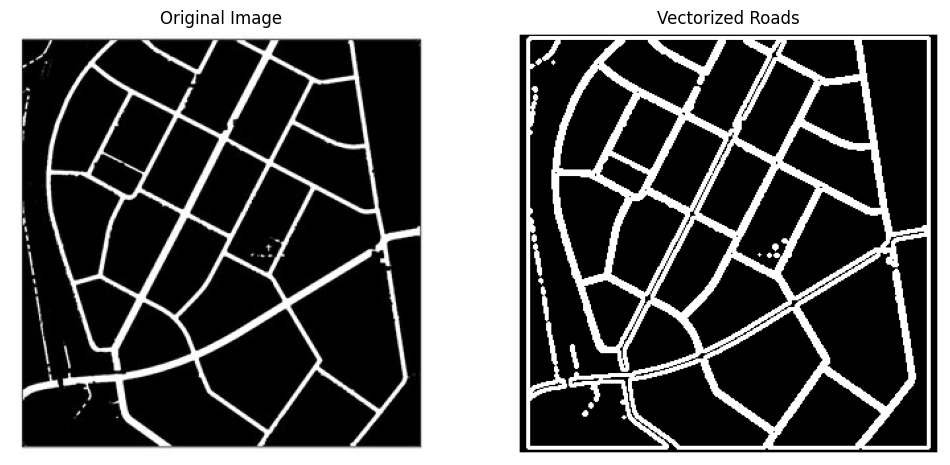

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the black and white image with black background and white roads
image_path = '/root/Road-and-building-masks-extracted-from-OSM_Q320.jpg'  # Replace 'your_image_path_here' with the actual image path
bw_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Check if the image was loaded
if bw_image is None:
    raise Exception("Image not loaded. Check the file path.")

# If your image is already nearly binary, you can comment out the next line or adjust the threshold value
_, binary_image = cv2.threshold(bw_image, 127, 255, cv2.THRESH_BINARY)

# Find contours in the binary image
contours, _ = cv2.findContours(binary_image, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)  # Changed retrieval mode and approximation method

# Create an empty image to draw contours
contour_image = np.zeros_like(bw_image)

# Draw the contours - change color to white and increase thickness
cv2.drawContours(contour_image, contours, -1, (255, 255, 255), 2)  # Increase thickness here

# Plot the original image and the image with contours
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(bw_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(contour_image, cmap='gray')
plt.title('Vectorized Roads')
plt.axis('off')

plt.show()


In [ ]:
pip install svgwrite

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 kB 1.5 MB/s eta 0:00:00


In [ ]:
import cv2
import numpy as np
import svgwrite  # Make sure svgwrite is installed

def create_svg(dwg, contours):
    """Function to add contours to an SVG drawing."""
    for contour in contours:
        # Ensure each point is a tuple (x, y)
        points = [(int(point[0][0]), int(point[0][1])) for point in contour]
        # Add polyline to the SVG drawing
        dwg.add(dwg.polyline(points, fill='none', stroke='black', stroke_width=1))

def main():
    # Load the black and white image with black background and white roads
    image_path = '/root/Road-and-building-masks-extracted-from-OSM_Q320.jpg'  # Replace with your image path
    output_svg_path = '/root/Road-and-building-masks-extracted-from-OSM_Q320.jpg.svg'  # Replace with your SVG output path
    bw_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    if bw_image is None:
        raise Exception("Image not loaded. Check the file path.")

    # Apply thresholding to clean up the image
    _, binary_image = cv2.threshold(bw_image, 127, 255, cv2.THRESH_BINARY)

    # Find contours in the binary image
    contours, _ = cv2.findContours(binary_image, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

    # Create an SVG drawing
    dwg = svgwrite.Drawing(output_svg_path, profile='tiny', size=(bw_image.shape[1], bw_image.shape[0]))

    # Add contours to the SVG drawing
    create_svg(dwg, contours)

    # Save the SVG file
    dwg.save()

    print("SVG file has been created successfully.")

if __name__ == "__main__":
    main()


SVG file has been created successfully.


In [ ]:
import xml.etree.ElementTree as ET

# Function to extract line segments from an SVG file
def extract_lines_from_svg(svg_file_path):
    lines = []
    tree = ET.parse(svg_file_path)
    root = tree.getroot()
    # SVG namespace
    ns = {'svg': 'http://www.w3.org/2000/svg'}
    # Find all line elements in the SVG
    for line in root.findall('.//svg:line', ns):
        x1 = float(line.get('x1'))
        y1 = float(line.get('y1'))
        x2 = float(line.get('x2'))
        y2 = float(line.get('y2'))
        lines.append(((x1, y1), (x2, y2)))
    return lines

# Example usage
svg_file_path = '/root/Road-and-building-masks-extracted-from-OSM_Q320.jpg.svg'  # Replace with your SVG file path
lines = extract_lines_from_svg(svg_file_path)

# Print the extracted line segments
for index, line in enumerate(lines):
    print(f"Line {index + 1}: Start {line[0]}, End {line[1]}")



In [ ]:
import xml.etree.ElementTree as ET

def extract_lines_from_svg(svg_file_path):
    lines = []
    tree = ET.parse(svg_file_path)
    root = tree.getroot()
    # Find all line elements, ignoring namespaces
    for line in root.findall('.//{*}line'):  # Make sure this line is correctly indented
        x1 = float(line.get('x1'))  # These lines should be indented
        y1 = float(line.get('y1'))  # Same here
        x2 = float(line.get('x2'))  # And here
        y2 = float(line.get('y2'))  # And here
        lines.append(((x1, y1), (x2, y2)))  # This one as well
    return lines

# Correctly indented example usage
svg_file_path = '/root/Road-and-building-masks-extracted-from-OSM_Q320.jpg.svg'  # Replace this with your actual file path
lines = extract_lines_from_svg(svg_file_path)
print(lines)  # This should now print the list of lines

[]


NameError: name 'root' is not defined

In [ ]:
def ccw(A, B, C):
    return (C[1] - A[1]) * (B[0] - A[0]) > (B[1] - A[1]) * (C[0] - A[0])

# Function to check if two line segments AB and CD intersect
def intersect(A, B, C, D):
    return ccw(A, C, D) != ccw(B, C, D) and ccw(A, B, C) != ccw(A, B, D)

# Function to get line segment intersection point, assuming they do intersect
def line_intersection(line1, line2):
    xdiff = (line1[0][0] - line1[1][0], line2[0][0] - line2[1][0])
    ydiff = (line1[0][1] - line1[1][1], line2[0][1] - line2[1][1])

    def det(a, b):
        return a[0] * b[1] - a[1] * b[0]

    div = det(xdiff, ydiff)
    if div == 0:
        raise Exception('lines do not intersect')

    d = (det(*line1), det(*line2))
    x = det(d, xdiff) / div
    y = det(d, ydiff) / div
    return x, y

# Main function to find intersections among a list of lines
def find_intersections(lines):
    intersections = {}
    for i, line1 in enumerate(lines):
        for j, line2 in enumerate(lines[i+1:], start=i+1):  # Avoid duplicate pairs and self-intersection
            if intersect(line1[0], line1[1], line2[0], line2[1]):
                try:
                    intersection_point = line_intersection(line1, line2)
                    # Here we use a dictionary to avoid duplicate intersections
                    intersections[intersection_point] = intersections.get(intersection_point, []) + [(i, j)]
                except Exception as e:
                    print(f"No intersection found for lines {i} and {j}: {e}")
    return intersections

# Example usage
lines = extract_lines_from_svg(svg_file_path)
intersections = find_intersections(lines)
print(intersections)


{}
